In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score



In [2]:
# Gráficas de dispersión y densidad
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # mantener solo columnas numéricas
    # Eliminar filas y columnas que llevarían a df a ser singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]# mantener columnas donde hay más de 1 valores únicos
    columnNames = list(df)
    if len(columnNames) > 10: # reducir el número de columnas para la inversión de matriz de las gráficas de densidad kernel
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [3]:
data=pd.read_csv('buddymove_holidayiq.csv')
data.shape

(249, 7)

In [4]:
data.isnull().sum()
df=data.drop('User Id', axis=1)


In [5]:
df.head(10)

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
5,3,52,109,93,52,76
6,3,64,85,82,73,69
7,3,54,107,92,54,76
8,3,64,108,64,54,93
9,3,86,76,74,74,103


<AxesSubplot: >

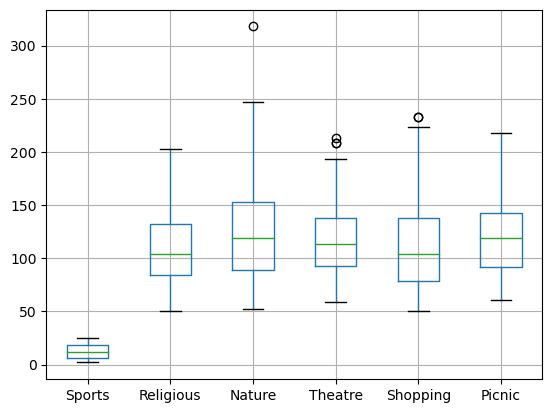

In [6]:
data.boxplot()

C:\Users\Antonio\AppData\Local\Temp\ipykernel_4596\3365373808.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


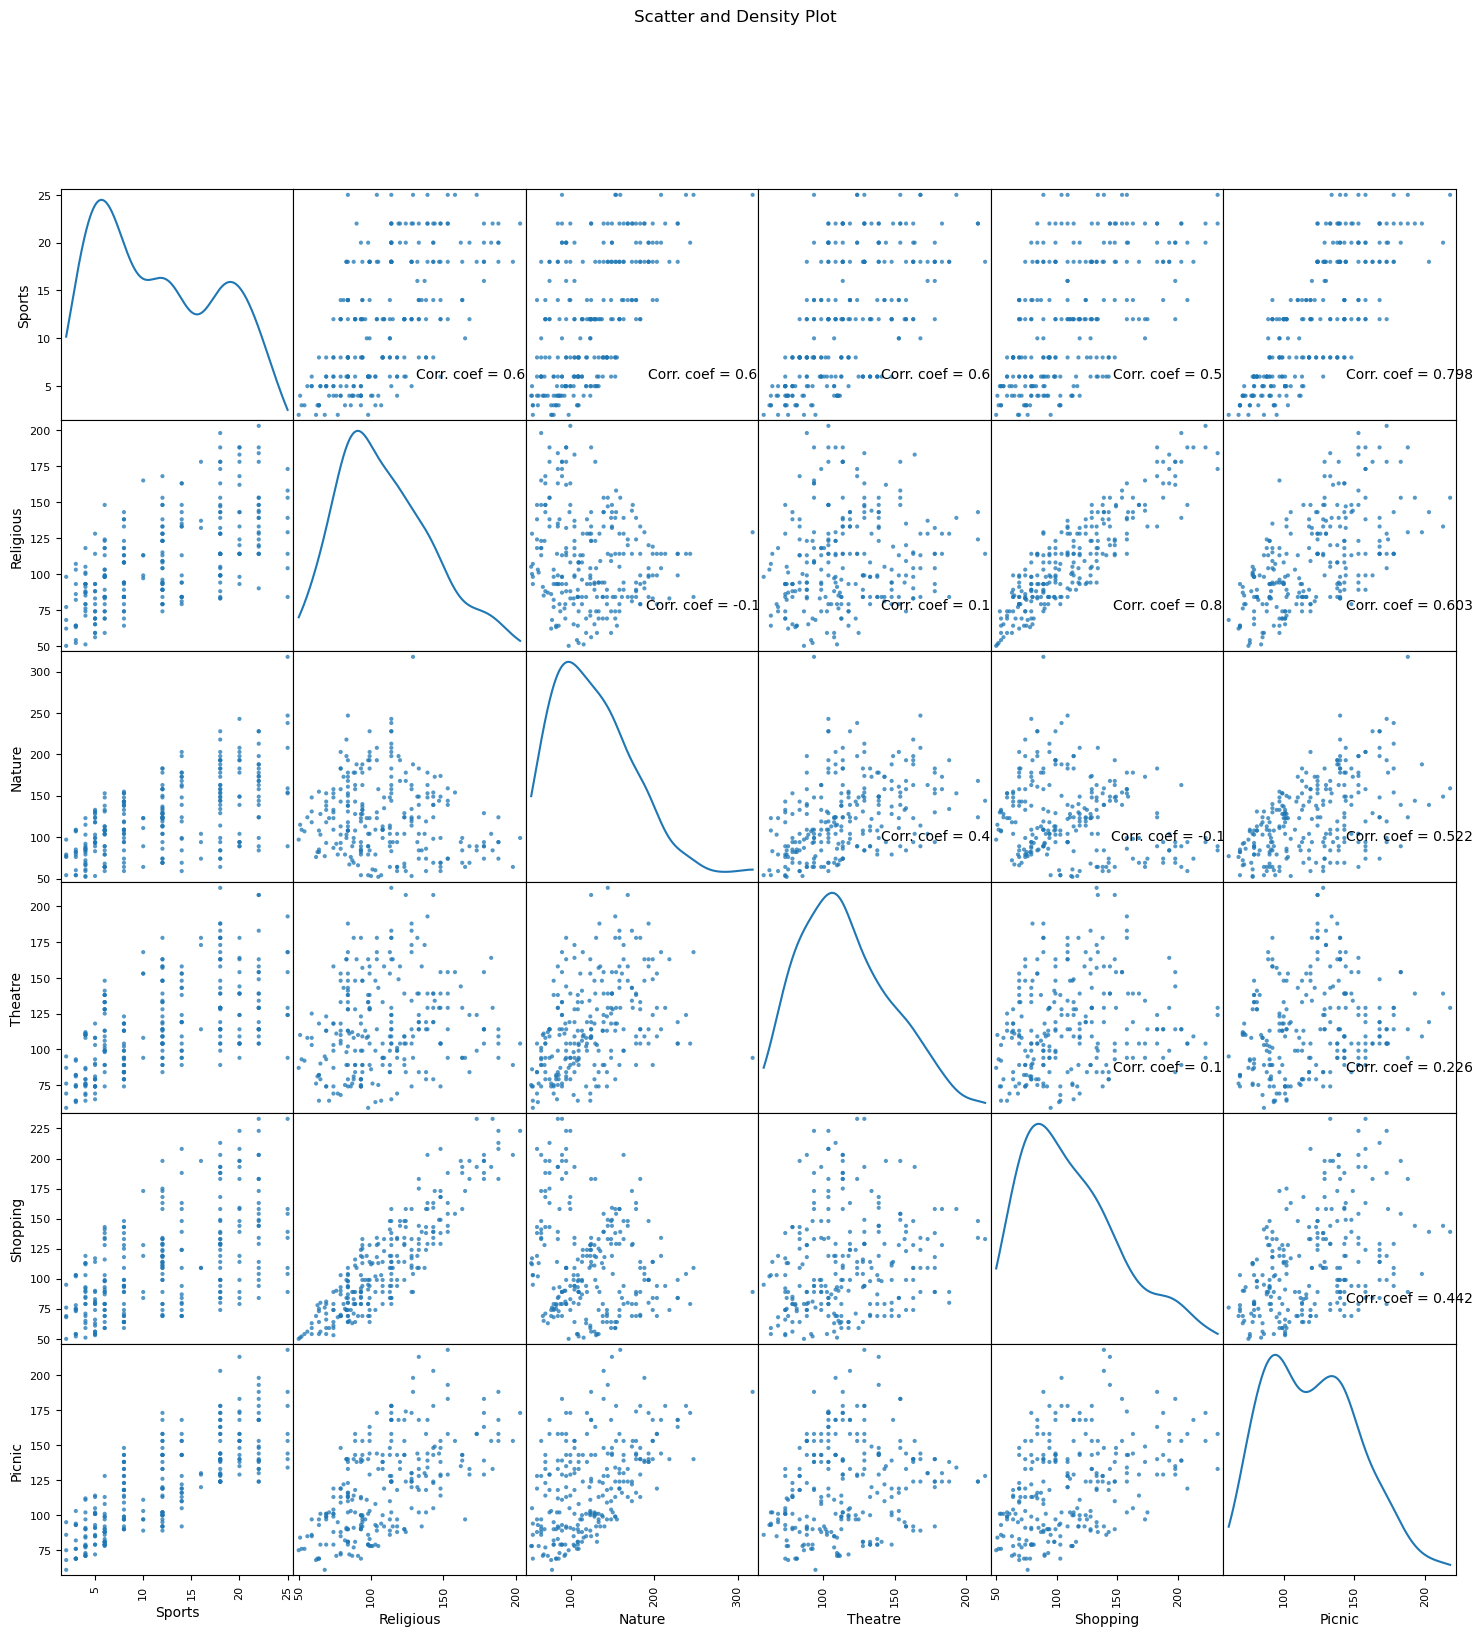

In [7]:
plotScatterMatrix(data, 18, 10)

In [8]:
datacmp = data.iloc[:,[3,4]].values

# aplicar el método k-medoids 
kmedoids = KMedoids(n_clusters=2, random_state=42)
y_kmedoids=kmedoids.fit_predict(datacmp)

labels = kmedoids.labels_

# agregar las etiquetas de cluster al DataFrame
data['cluster'] = labels

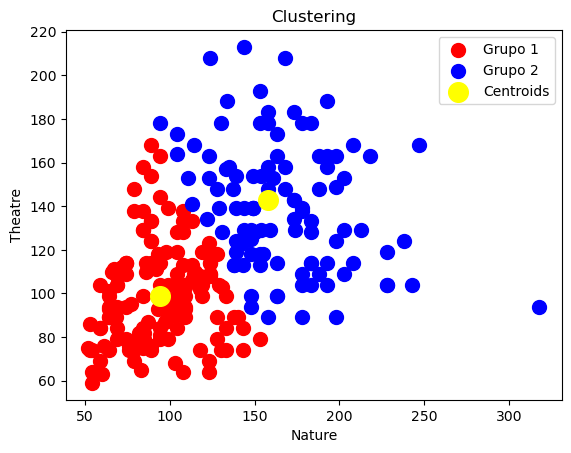

In [9]:
plt.scatter(datacmp[y_kmedoids == 0, 0], datacmp[y_kmedoids == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(datacmp[y_kmedoids == 1, 0], datacmp[y_kmedoids== 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Nature')
plt.ylabel('Theatre')
plt.legend()
plt.show()

C:\Users\Antonio\anaconda3\envs\entorno_pandas\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


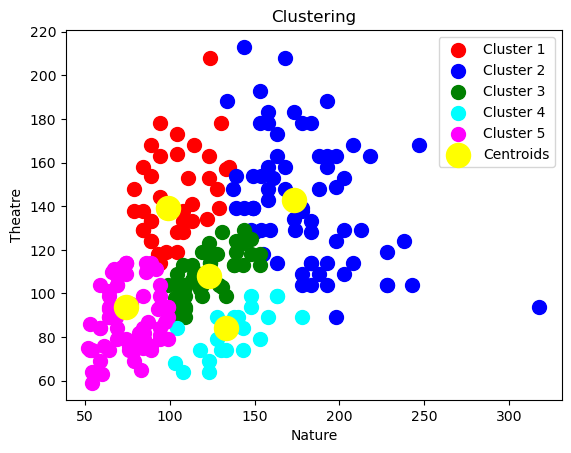

In [10]:

kmedoids = KMedoids(n_clusters=5, random_state=42)
y_kmedoids=kmedoids.fit_predict(datacmp)

# Visualization of clusters
plt.scatter(datacmp[y_kmedoids == 0, 0], datacmp[y_kmedoids == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(datacmp[y_kmedoids == 1, 0], datacmp[y_kmedoids == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(datacmp[y_kmedoids == 2, 0], datacmp[y_kmedoids == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(datacmp[y_kmedoids == 3, 0], datacmp[y_kmedoids == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(datacmp[y_kmedoids == 4, 0], datacmp[y_kmedoids == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Nature')
plt.ylabel('Theatre')
plt.legend()
plt.show()

In [11]:
coeficiente_silueta = silhouette_score(df, labels, metric='euclidean')
print("1) Silhouette coefficient = ",coeficiente_silueta)

indice_db = davies_bouldin_score(df, labels)
print("2) Davies-Bouldin = ",indice_db)

indice_ch = calinski_harabasz_score(df, labels)
print("3) Calinski-Harabasz = ",indice_ch)

1) Silhouette coefficient =  0.25749340879285715
2) Davies-Bouldin =  1.520439903545728
3) Calinski-Harabasz =  90.32558142545533


In [12]:
features = ['Nature','Theatre']
datacmp_meanshift = data[features]

bandwidth = estimate_bandwidth(datacmp_meanshift,quantile=0.20)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(datacmp_meanshift)

cluster_centers = meanshift.cluster_centers_
labelsMean = meanshift.labels_

datacmp_meanshift['cluster_meanshift'] = labelsMean

C:\Users\Antonio\AppData\Local\Temp\ipykernel_4596\2839243788.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacmp_meanshift['cluster_meanshift'] = labelsMean


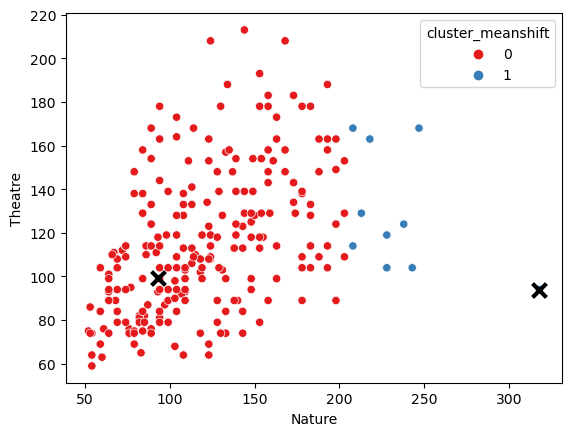

In [13]:
sb.scatterplot(x='Nature',y='Theatre',data = datacmp_meanshift,hue='cluster_meanshift',palette="Set1")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='k', s=100, linewidths=3, zorder=10)


plt.show()

In [14]:
coeficiente_silueta = silhouette_score(df, labelsMean, metric='euclidean')
print("1) Silhouette coefficient = ",coeficiente_silueta)

indice_db = davies_bouldin_score(df, labelsMean)
print("2) Davies-Bouldin = ",indice_db)

indice_ch = calinski_harabasz_score(df, labelsMean)
print("3) Calinski-Harabasz = ",indice_ch)

1) Silhouette coefficient =  0.2554619873750531
2) Davies-Bouldin =  0.9389527787854429
3) Calinski-Harabasz =  26.096027936690735
